In [15]:
import cv2
import os

In [16]:
path = 'C:/Users/KangDongha/Desktop/junior/predict'

In [17]:
from keras.models import load_model

model_save_path = 'C:/Users/KangDongha/Desktop/junior/model_trained_data.h5'
model = load_model(model_save_path)

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [19]:
import numpy as np
np.set_printoptions(precision=8, suppress=True)

In [20]:
def preprocessing_predict(pred_img):
    pred_img_path = os.path.join(path, pred_img)
    pred_img_Equ = cv2.imread(pred_img_path, 0)
    pred_img_Equ = cv2.equalizeHist(pred_img_Equ)
    pred_img_Equ = pred_img_Equ/255
    
    pred_img_Equ = cv2.resize(pred_img_Equ, (32, 32))
    pred_img_Equ = pred_img_Equ.reshape(1, 32, 32, 1)
    
    image = img.imread(path + '/' + pred_img)
    plt.imshow(image)
    
    return pred_img_Equ

In [21]:
def result(predict_result):
    total = model.predict(predict_result)
    print(total)
    probabilityValue = np.amax(total)
    print(probabilityValue)
    classIndex = model.predict_classes(predict_result)
    
    if(classIndex == 0):
        print('No Right Turn')
    elif(classIndex == 1):
        print('Speed Bump')
    elif(classIndex == 2):
        print('U Turn')
        
    return

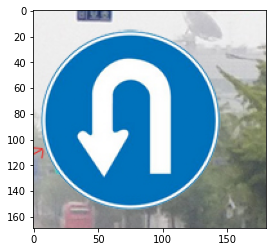

In [22]:
predict = preprocessing_predict('U_Turn.PNG')

In [10]:
result(predict)

[[0.00003092 0.00072119 0.99924785]]
0.99924785
U Turn


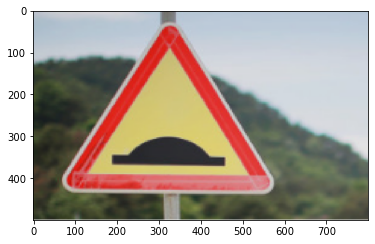

In [23]:
predict1 = preprocessing_predict('Speed_Bump.PNG')

In [24]:
result(predict1)

[[0.00054066 0.9993925  0.00006679]]
0.9993925
Speed Bump


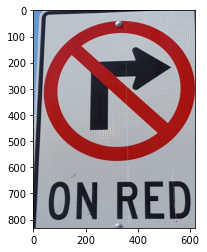

In [25]:
predict2 = preprocessing_predict('No_Right_Turn.PNG')

In [26]:
result(predict2)

[[1.         0.00000005 0.        ]]
1.0
No Right Turn
